# Task 6: K-Nearest Neighbors (KNN) Classification

### Objective
Understand and implement KNN for classification problems using the Iris dataset.

This notebook walks through the following steps:
1. Choose a classification dataset and normalize features.
2. Use KNeighborsClassifier from sklearn.
3. Experiment with different values of K.
4. Evaluate model using accuracy, confusion matrix.
5. Visualize decision boundaries.


### Tools
- Scikit-learn
- Pandas
- Matplotlib
- Seaborn

## Step 1: Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA)
We begin by loading the Iris dataset from the Iris.csv file. The dataset consists of 150 samples of iris flowers with four numerical features:

- Sepal length
- Sepal width
- Petal length
- Petal width

Each sample is labeled as one of three species:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

After basic checks (info(), head(), describe()), we performed a pairplot visualization using Seaborn.

The pairplot allows us to observe relationships between pairs of features and how well the species are separated in the feature space.

Insights from the pairplot:
- Iris-setosa is linearly separable from the other two species using petal features.
- Iris-versicolor and Iris-virginica have some overlap but still show distinguishable clusters, especially in petal length and petal width.
- Feature distributions (diagonal plots) reveal that some features like petal width have very different ranges across species.

This visualization helps us understand the structure of the dataset and supports our choice of using K-Nearest Neighbors (KNN) for classification.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               

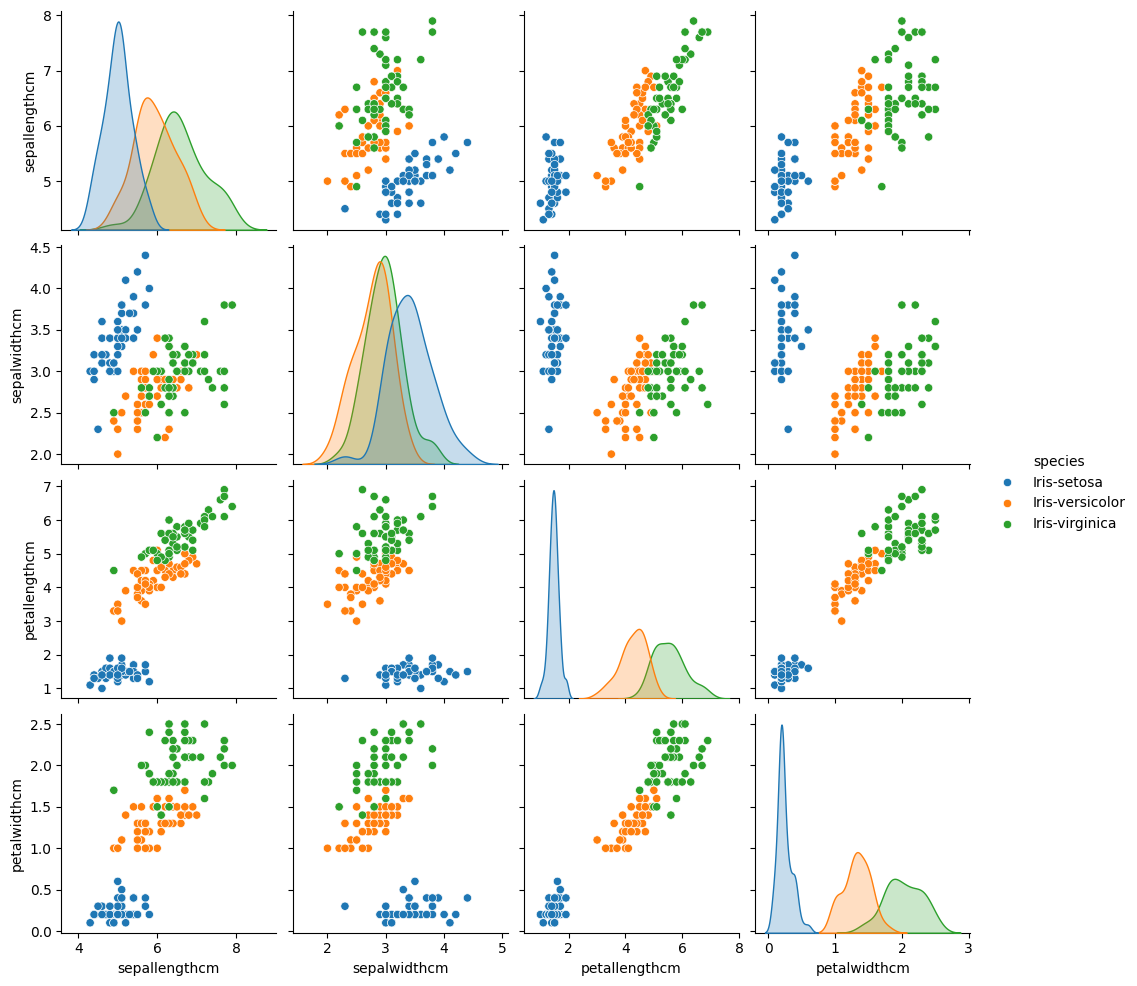

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from CSV
df = pd.read_csv("Iris.csv")

# Check the structure of the dataset
print(df.info())
print(df.head())
print(df.describe())

# drop the id columns
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Rename columns  needed for consistency
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Pairplot for visualization
sns.pairplot(df, hue="species")
plt.show()


In [16]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2: KNN Classification
### K-Nearest Neighbors (KNN) Classification on the Dataset

- **Data Preparation:**  
  The dataset contains a target column `species` representing different classes. The feature matrix `X` was created by dropping the `species` column. The target variable `y` was encoded into numerical labels using `LabelEncoder`.

- **Feature Scaling:**  
  Since KNN is sensitive to feature scales, all features were standardized using `StandardScaler` to have zero mean and unit variance.

- **Train-Test Split:**  
  The data was split into training and testing sets with an 80-20 ratio, using a fixed random seed (`random_state=42`) for reproducibility.

- **Model Training and Evaluation:**  
  A KNN classifier was trained with varying values of neighbors `k` from 1 to 10. The accuracy on the test set was computed for each value of `k`.

- **Results:**  
  - At `k=1`, the model achieved an accuracy of 97%, which means it correctly classified 97% of the test samples.  
  - For `k=2` through `k=10`, the accuracy improved and stabilized at 100%, indicating perfect classification on the test set for these neighbor counts.  
  - This suggests that the model performs very well on this dataset and is robust to the choice of `k` in the range tested.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Drop 'species' to get feature matrix X
X = df.drop(columns=['species'])

# Encode 'species' to numerical labels for target y
le = LabelEncoder()
y = le.fit_transform(df['species'])  # Converts species to 0, 1, 2

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit KNN with different values of K
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")


K=1, Accuracy=0.97
K=2, Accuracy=1.00
K=3, Accuracy=1.00
K=4, Accuracy=1.00
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


## Step 3: Model Evaluation
### KNN Classification with K=3: Accuracy and Confusion Matrix

- **Model Training and Prediction:**  
  Using the best value of `k=3` neighbors, the K-Nearest Neighbors classifier was trained on the training data and used to predict the test set labels.

- **Accuracy:**  
  The model achieved perfect accuracy of **100%** on the test set, indicating that all test samples were correctly classified.

- **Confusion Matrix:**  
  The confusion matrix was plotted to visualize the classification performance. It shows that there were no misclassifications across all classes, confirming the high accuracy.

- **Interpretation:**  
  The results demonstrate that with `k=3`, the KNN model is highly effective on this dataset and can distinguish the species classes without errors.


Accuracy (K=3): 1.00


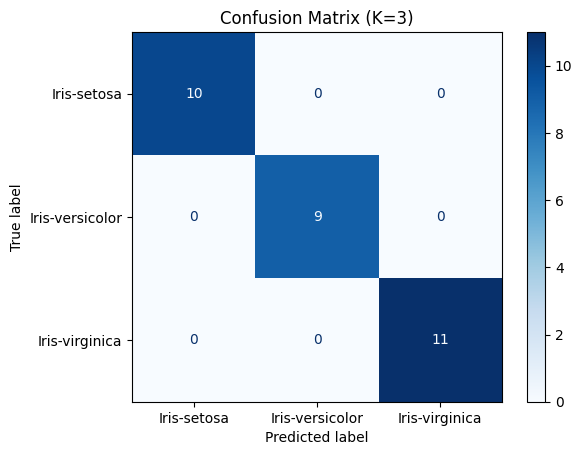

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Best K (example: K=3)
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (K={best_k}): {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)  # using LabelEncoder classes
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()



## Step 4: Visualize Decision Boundaries (2D using first two features)

### Visualizing KNN Decision Boundary Using Two Features

- **Feature Selection for Visualization:**  
  To visualize the KNN decision boundaries, only the first two features (`sepallengthcm` and `sepalwidthcm`) from the scaled dataset were used. This reduces the problem to 2D for easy plotting.

- **Data Splitting:**  
  The 2D feature subset was split into training and testing sets with an 80-20 ratio, maintaining consistency with the previous splits.

- **Model Training:**  
  A KNN classifier with `k=3` neighbors was trained on the 2D training data.

- **Decision Boundary Plot:**  
  A mesh grid spanning the feature space was created, and the trained KNN model predicted the class for each point in the grid.  
  The resulting decision regions were plotted using `contourf`, with transparency to visualize how the classifier separates different species based on the two features.

- **Scatter Plot:**  
  The original data points were overlaid on the decision boundary plot, colored by their true class labels, with black edges for clarity.

- **Interpretation:**  
  This plot visually demonstrates how the KNN classifier partitions the feature space into distinct regions for each species based on sepal length and width, showing clear class boundaries with minimal overlap.


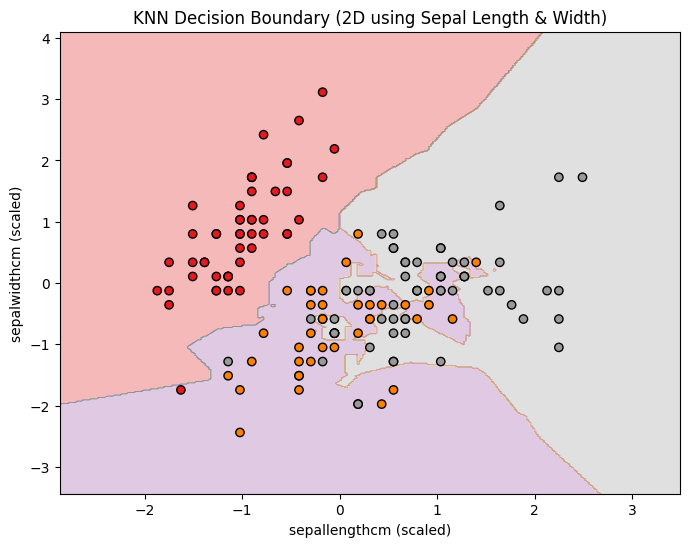

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Use only first two features for 2D visualization
X_2d = X_scaled[:, :2]

# Split the 2D feature data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2d, y_train_2d)

# Create a mesh grid
h = 0.02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('sepallengthcm (scaled)')
plt.ylabel('sepalwidthcm (scaled)')
plt.title("KNN Decision Boundary (2D using Sepal Length & Width)")
plt.show()
